# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [ ]:
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = None, names = columns, skiprows=1))


# Get X and Y

Create the features data frame and target data.

In [ ]:
X = fires_dt.drop(columns=['area'])
Y = fires_dt['area']

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [ ]:
X

,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [ ]:
# preproc1

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
cat_cols = ['month', 'day']

p1_ctransform  = ColumnTransformer(
    transformers=[
        ('num_transforms_p1', StandardScaler(), num_cols),
        ('cat_transforms_p1', OneHotEncoder(), cat_cols)
    ]
)


p1_ctransform

ColumnTransformer(transformers=[('num_transforms_p1', StandardScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat_transforms_p1', OneHotEncoder(),
                                 ['month', 'day'])])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [ ]:
# preproc2

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer

p2_ctransform = ColumnTransformer(
    transformers=[
        ('num_transform_p2', Pipeline([
            ('scaler', StandardScaler()),
            ('transform', PowerTransformer())
        ]), num_cols),
        ('cat_transform_p2', OneHotEncoder(), cat_cols)
    ]
)

p2_ctransform


ColumnTransformer(transformers=[('num_transform_p2',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('transform',
                                                  PowerTransformer())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat_transform_p2', OneHotEncoder(),
                                 ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_validate

scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']
           
# Pipeline A = preproc1 + baseline

pipeline_a = Pipeline([
    ('preprocessing', p1_ctransform),
    ('regressor', KNeighborsRegressor())
])

param_grid_pa = {
    'regressor__n_neighbors': [3, 5, 7, 9],
    'regressor__weights': ['uniform', 'distance']
}

grid_cv_pa = GridSearchCV(estimator=pipeline_a, 
                          param_grid=param_grid_pa, 
                          cv=5,
                          scoring=scoring,
                          refit="neg_root_mean_squared_error")

grid_cv_pa.fit(X_train, Y_train)
cv_results_pa = cross_validate(grid_cv_pa.best_estimator_, X_train, Y_train, cv=5, scoring=scoring)


print(pd.DataFrame(cv_results_pa).mean())

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/pi

fit_time                             0.014326
score_time                           0.015742
test_neg_root_mean_squared_error   -52.335846
test_neg_mean_absolute_error       -21.349974
test_r2                             -2.821436
dtype: float64


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/pi

In [ ]:
# Pipeline B = preproc2 + baseline

pipeline_b = Pipeline([
    ('preprocessing', p2_ctransform),
    ('regressor', KNeighborsRegressor())
])

param_grid_pb = {
    'regressor__n_neighbors': [3, 5, 7, 9],
    'regressor__weights': ['uniform', 'distance']
}

grid_cv_pb = GridSearchCV(estimator=pipeline_b, 
                          param_grid=param_grid_pb, 
                          cv=5,
                          scoring=scoring,
                          refit="neg_root_mean_squared_error")

grid_cv_pb.fit(X_train, Y_train)
cv_results_pb = cross_validate(grid_cv_pb.best_estimator_, X_train, Y_train, cv=5, scoring=scoring)

print(pd.DataFrame(cv_results_pb).mean())


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/pi

fit_time                             0.034719
score_time                           0.014468
test_neg_root_mean_squared_error   -50.784384
test_neg_mean_absolute_error       -21.652527
test_r2                             -2.468371
dtype: float64


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/pi

In [ ]:
# Pipeline C = preproc1 + advanced model

from sklearn.ensemble import RandomForestRegressor

pipeline_c = Pipeline([
    ('preprocessing', p1_ctransform),
    ('regressor', RandomForestRegressor(random_state=42))
])

param_grid_pc = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_cv_pc = GridSearchCV(estimator=pipeline_c, 
                          param_grid=param_grid_pc, 
                          cv=5,
                          scoring=scoring,
                          refit="neg_root_mean_squared_error")


grid_cv_pc.fit(X_train, Y_train)
cv_results_pc = cross_validate(grid_cv_pc.best_estimator_, X_train, Y_train, cv=5, scoring=scoring)


print(pd.DataFrame(cv_results_pc).mean())

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/pi

fit_time                             0.371344
score_time                           0.017127
test_neg_root_mean_squared_error   -43.260203
test_neg_mean_absolute_error       -22.311963
test_r2                             -1.391932
dtype: float64


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/pi

In [ ]:
# Pipeline D = preproc2 + advanced model

pipeline_d = Pipeline([
    ('preprocessing', p2_ctransform),
    ('regressor', RandomForestRegressor(random_state=42))
])

param_grid_pd = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_cv_pd = GridSearchCV(estimator=pipeline_d, 
                          param_grid=param_grid_pd, 
                          cv=5,
                          scoring=scoring,
                          refit="neg_root_mean_squared_error")


grid_cv_pd.fit(X_train, Y_train)
cv_results_pd = cross_validate(grid_cv_pd.best_estimator_, X_train, Y_train, cv=5, scoring=scoring)


print(pd.DataFrame(cv_results_pd).mean())

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/pi

fit_time                             0.403560
score_time                           0.019220
test_neg_root_mean_squared_error   -42.859559
test_neg_mean_absolute_error       -22.086455
test_r2                             -1.362004
dtype: float64


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/pi

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [85]:
#pipeline a

param_grid_pa = {
    'regressor__n_neighbors': [3, 5, 7, 9],
    'regressor__weights': ['uniform', 'distance']
}

grid_cv_pa = GridSearchCV(estimator=pipeline_a, 
                          param_grid=param_grid_pa, 
                          cv=5,
                          scoring=scoring,
                          refit="neg_root_mean_squared_error")

grid_cv_pa.fit(X_train, Y_train)
cv_results_pa = cross_validate(grid_cv_pa.best_estimator_, X_train, Y_train, cv=5, scoring=scoring)


print(pd.DataFrame(cv_results_pa).mean())

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/pi

fit_time                             0.007963
score_time                           0.007238
test_neg_root_mean_squared_error   -52.335846
test_neg_mean_absolute_error       -21.349974
test_r2                             -2.821436
dtype: float64


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/pi

In [86]:
#pipeline b

param_grid_pb = {
    'regressor__n_neighbors': [3, 5, 7, 9],
    'regressor__weights': ['uniform', 'distance']
}

grid_cv_pb = GridSearchCV(estimator=pipeline_b, 
                          param_grid=param_grid_pb, 
                          cv=5,
                          scoring=scoring,
                          refit="neg_root_mean_squared_error")

grid_cv_pb.fit(X_train, Y_train)
cv_results_pb = cross_validate(grid_cv_pb.best_estimator_, X_train, Y_train, cv=5, scoring=scoring)

print(pd.DataFrame(cv_results_pb).mean())


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/pi

fit_time                             0.023571
score_time                           0.008166
test_neg_root_mean_squared_error   -50.784384
test_neg_mean_absolute_error       -21.652527
test_r2                             -2.468371
dtype: float64


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/pi

In [87]:
#pipeline c

param_grid_pc = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_cv_pc = GridSearchCV(estimator=pipeline_c, 
                          param_grid=param_grid_pc, 
                          cv=5,
                          scoring=scoring,
                          refit="neg_root_mean_squared_error")


grid_cv_pc.fit(X_train, Y_train)
cv_results_pc = cross_validate(grid_cv_pc.best_estimator_, X_train, Y_train, cv=5, scoring=scoring)


print(pd.DataFrame(cv_results_pc).mean())

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/pi

fit_time                             0.271512
score_time                           0.009241
test_neg_root_mean_squared_error   -43.260203
test_neg_mean_absolute_error       -22.311963
test_r2                             -1.391932
dtype: float64


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/pi

In [88]:
#pipeline d

param_grid_pd = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_cv_pd = GridSearchCV(estimator=pipeline_d, 
                          param_grid=param_grid_pd, 
                          cv=5,
                          scoring=scoring,
                          refit="neg_root_mean_squared_error")


grid_cv_pd.fit(X_train, Y_train)
cv_results_pd = cross_validate(grid_cv_pd.best_estimator_, X_train, Y_train, cv=5, scoring=scoring)


print(pd.DataFrame(cv_results_pd).mean())

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/pi

fit_time                             0.313505
score_time                           0.010473
test_neg_root_mean_squared_error   -42.859559
test_neg_mean_absolute_error       -22.086455
test_r2                             -1.362004
dtype: float64


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/pi

# Evaluate

+ Which model has the best performance?

Answer: Based on the selected performance metrics, Pipeline D is the best performing model as it generated the lowest RMSE (-42.859559) and highest R-square (-1.362004) values.

# Export

+ Save the best performing model to a pickle file.

In [89]:
import pickle

best_model = grid_cv_pd.best_estimator_

with open('best_model_pkl_file', 'wb') as file:
    pickle.dump(best_model, file)

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

*(Answer here.)*

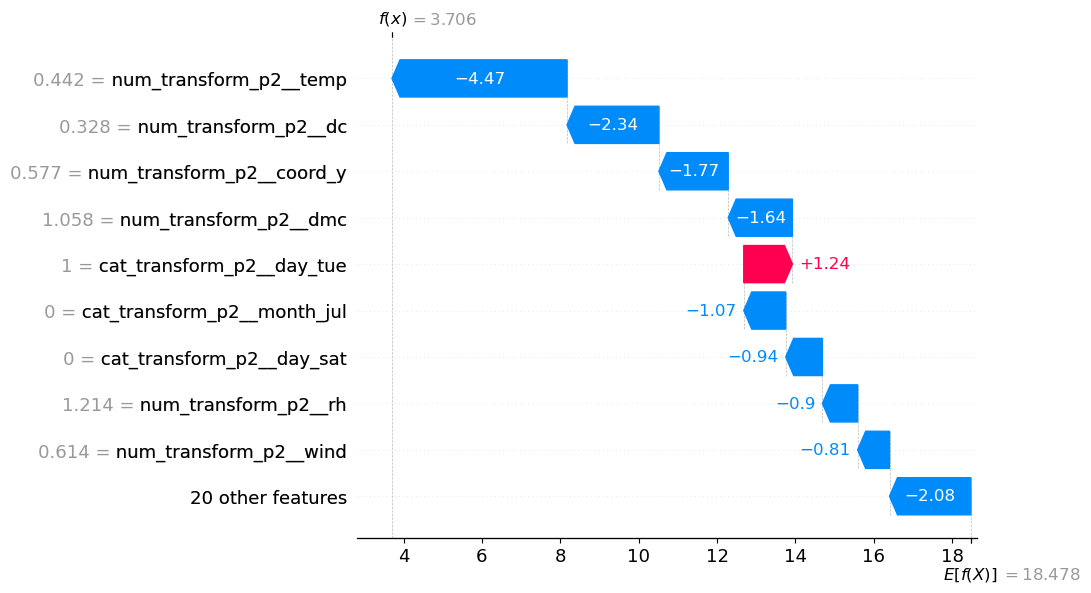

In [96]:
with open('best_model_pkl_file', 'rb') as file:
    best_model = pickle.load(file)

import shap
data_transform = best_model.named_steps['preprocessing'].transform(X_test)

explainer = shap.Explainer(
    best_model.named_steps['regressor'], 
    data_transform, 
    feature_names=best_model.named_steps['preprocessing'].get_feature_names_out())

shap_values = explainer(data_transform)

#specific observation
shap.plots.waterfall(shap_values[1])



+ In this specific observation, the most important festures are 'num_transform_p2__temp' and 'num_transform_p2__dc', meanwhile, 'num_transform_p2__coord_y', 'num_transform_p2__dmc', and 'cat_transform_p2__day_tue' are also important.

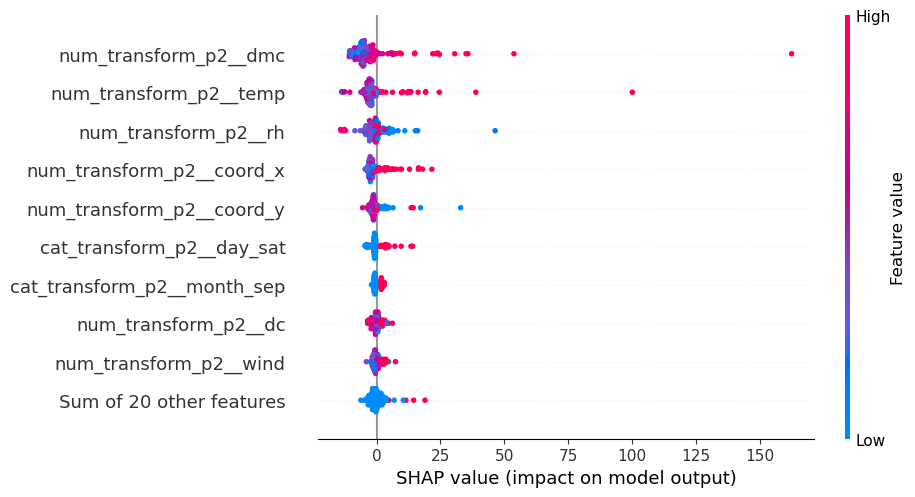

In [98]:
#general observation
shap.plots.beeswarm(shap_values)

+ In general, the most important features are 'num_transform_p2__dmc', 'num_transform_p2__temp', 
'num_transform_p2__rh', 'num_transform_p2__coord_x' and 'num_transform_p2__coord_y'. 
And the least important features are 'num_transform_p2__dc', 'num_transform_p2__wind', 'cat_transform_p2__day_sat' and 'cat_transform_p2__month_sep'.

+ I will remove the lease important and impactful features generated above ('num_transform_p2__dc', 'num_transform_p2__wind', 'cat_transform_p2__day_sat' and 'cat_transform_p2__month_sep'), as they contain the smallest shap value. To test the performance, I will retrain the model after those features were removed and proceed the evaluation again to compare the performance metrics (RMSE, MSE and R-square) to make sure the model's performance and effectivneess is not being decreased. Therefore, we can enhance the model performance by only including the most impactful features.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.